# Exercise 2 - Euler's method
**Author:** Schäfer, Torben

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import simulation

## 2.1 Shark-Tuna Model

Create the change vectors of the Shark-Tuna model:

$$
\begin{align*}
\dot{S} &= 0.005 \cdot S \cdot T - 0.2 \cdot S \\
\dot{T} &= 0.5 \cdot T - 0.01 \cdot S \cdot T
\end{align*}
$$

**a) What can you say about a possible trajectory?**

$$
\begin{align*}
\pmatrix{\dot{S} \\ \dot{T}} &= \pmatrix{S \cdot (0.005 \cdot T - 0.2) \\ T \cdot (0.5 - 0.01 \cdot S)}
\end{align*}
$$

If the shark population exceeds 50, the tuna population decreases; otherwise, the tuna population grows. For sharks, if there are more than 40 tunas, their population increases and declines for lower values. The rate of change is always proportional to the size of the population.
With exactly 50 sharks and 40 tunas, no change occurs. If both populations start at zero, they will remain zero. If only one population exists, it will change exponentially — grow in the case of the tunas, and decline in the case of the sharks. However, due to the recursive calls in the current implementation, ensuring high accuracy levels takes much more time. The threshold for accuracy can be changed in the simulation script.

**b) Integrate the the shark tuna model.**

**c) If you take $\delta t$ too large, what will happen? Experiment with different sizes of $\delta t$. How small
should $\delta t$ be?**

The choice of the fixed $\delta t$ depends on the number of iterations and the rate of change along the trajectory. For shorter simulations and small rates of change, such as near equilibrium, larger values of $\delta t$ can be chosen. In the simulation below, you can see that lowering $\delta t$ beyond $0.005$ offers only minor improvements for the chosen parameters. To reduce computational cost and ensure accuracy, dynamic estimations of $\delta t$ yield the best results.

**d) Plot the behavior of the sharks and tuna in time.**


In [2]:
# Implement Shark-Tuna Model

def shark_tuna_model(population: tuple[float, float]) -> tuple[float, float]:
    """
    Calculates the rate of change for the Shark-Tuna model, a specific Hunter-Prey model.
    The first entry corresponds with the shark population size, the other one represents the tunas.
    """
    shark, tuna = population
    return (0.005 * shark * tuna - 0.2 * shark, 0.5 * tuna - 0.01 * shark * tuna)

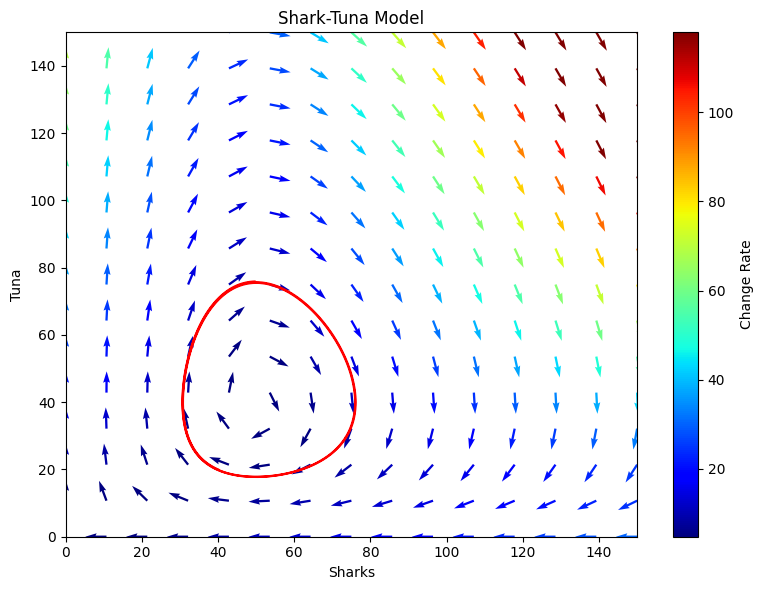

In [3]:
# Integration of the Shark-Tuna Model

size = ((0, 150), (0, 150))
resolution = 15
title = "Shark-Tuna Model"
axes = "Sharks", "Tuna"
figsize = (8, 6)
color = plt.cm.jet
start = np.array([40, 20])
trajectory = simulation.calculate_trajectory(start, shark_tuna_model, delta=0.005, steps=10_000)
simulation.plot_trajectory(trajectory, size, resolution, shark_tuna_model, title, axes, figsize, color)

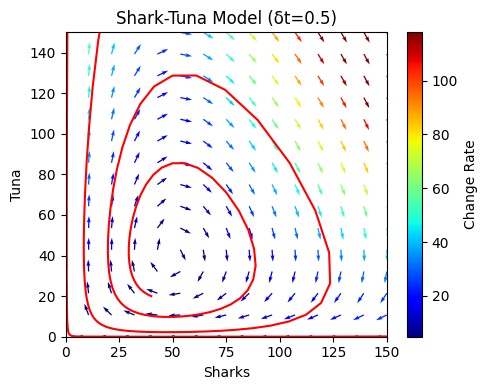

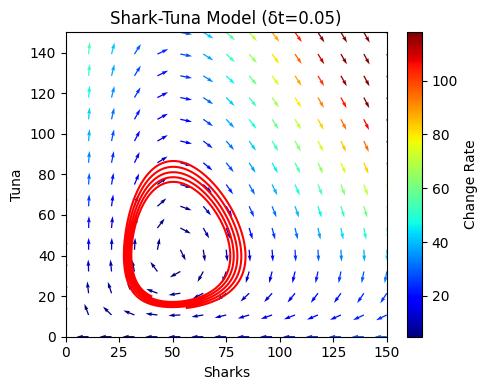

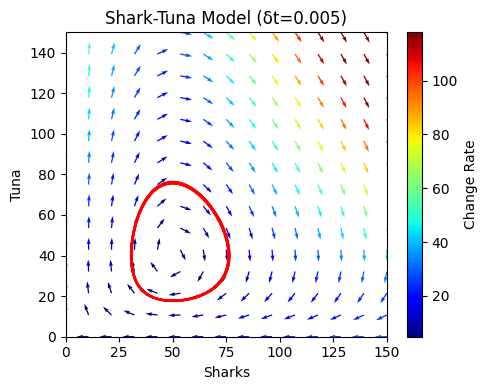

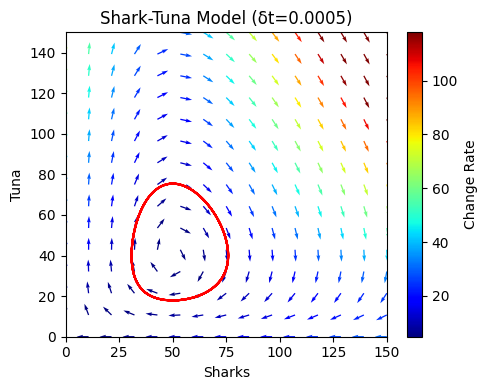

In [4]:
# Delta Test

figsize = (5, 4)
deltas = [0.5, 0.05, 0.005, 0.0005]

for delta in deltas:
    steps = int(100 * (1/delta))
    trajectory = simulation.calculate_trajectory(start, shark_tuna_model, delta, steps)
    simulation.plot_trajectory(trajectory, size, resolution, shark_tuna_model, f"{title} (δt={delta})", axes, figsize, color)

Step size (δt) statistics:
Min: 0.001, Max: 0.01, Average: 0.00526193


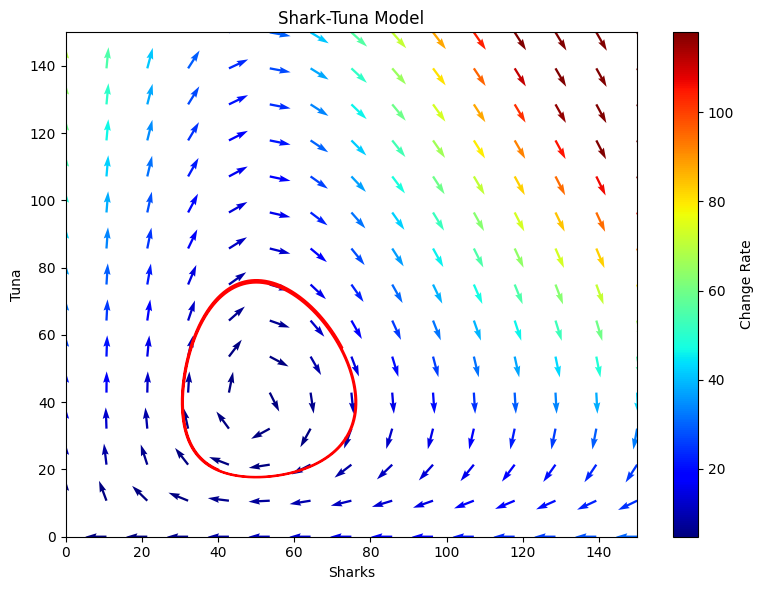

In [5]:
# Dynamic Calculation of δt

figsize = (8, 6)
steps = 10_000

trajectory = simulation.calculate_trajectory(start, shark_tuna_model, steps=steps, dynamic=True)
simulation.plot_trajectory(trajectory, size, resolution, shark_tuna_model, title, axes, figsize, color)

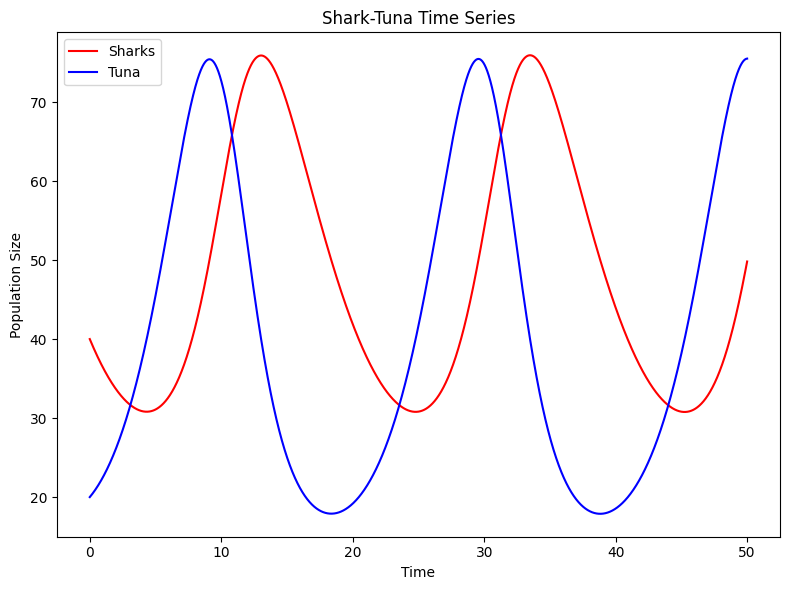

In [6]:
# Evoultion of Population Size in Time

# Parameters for simulation
start = np.array([40, 20])
steps = 50_000
delta = 0.001

# Parameters for visualisation
title = "Shark-Tuna Time Series"
labels = "Sharks", "Tuna"
yaxis = "Population Size"
figsize = (8, 6)

# Simulation
trajectory = simulation.calculate_trajectory(start, shark_tuna_model, delta=delta, steps=steps)
simulation.plot_time_series(trajectory, delta, title, labels, yaxis, figsize)